# Peter Pen NLTK Analytic Project

## # Introduction
<p><img src="https://assets.datacamp.com/production/project_1010/img/book_cover.jpg" alt="The book cover of Peter and Wendy" style="width:183;height:253px;"></p>
<h3 id="flyawaywithpeterpan">Fly away with Peter Pan!</h3>
<p>Peter Pan has been the companion of many children, and went a long way, starting as a Christmas play and ending up as a Disney classic. Did you know that although the play was titled "Peter Pan, Or The Boy Who Wouldn't Grow Up", J. M. Barrie's novel was actually titled "Peter and Wendy"? </p>
<p>You're going to explore and analyze Peter Pan's text to answer the question in the instruction pane below. You are working with the text version available here at <a href="https://www.gutenberg.org/files/16/16-h/16-h.htm">Project Gutenberg</a>. Feel free to add as many cells as necessary. Finally, remember that you are only tested on your answer, not on the methods you use to arrive at the answer!</p>
<p><strong>Note:</strong> If you haven't completed a DataCamp project before you should check out the <a href="https://projects.datacamp.com/projects/33">Intro to Projects</a> first to learn about the interface. <a href="https://www.datacamp.com/courses/intermediate-importing-data-in-python">Intermediate Importing Data in Python</a> and <a href="https://www.datacamp.com/courses/introduction-to-natural-language-processing-in-python">Introduction to Natural Language Processing in Python</a> teach the skills required to complete this project. Should you decide to use them, English stopwords have been downloaded from <code>nltk</code> and are available for you in your environment.</p>

## Import modules

In [1]:
from bs4 import BeautifulSoup
from collections import Counter
import requests
import nltk

In [2]:
url = "https://www.gutenberg.org/files/16/16-h/16-h.htm"

r = requests.get(url)
# r.status_code # Check the connection success or not

r.encoding = "utf-8"

html = r.text

print(html[:2000])

<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Strict//EN"
"http://www.w3.org/TR/xhtml1/DTD/xhtml1-strict.dtd">
<html xmlns="http://www.w3.org/1999/xhtml" xml:lang="en" lang="en">
<head>
<meta http-equiv="Content-Type" content="text/html;charset=utf-8" />
<meta http-equiv="Content-Style-Type" content="text/css" />
<title>The Project Gutenberg eBook of Peter Pan, by James M. Barrie</title>

<style type="text/css">

body { margin-left: 20%;
       margin-right: 20%;
       text-align: justify; }

h1, h2, h3, h4, h5 {text-align: center; font-style: normal; font-weight:
normal; line-height: 1.5; margin-top: .5em; margin-bottom: .5em;}

h1 {font-size: 300%;
    margin-top: 0.6em;
    margin-bottom: 0.6em;
    letter-spacing: 0.12em;
    word-spacing: 0.2em;
    text-indent: 0em;}
h2 {font-size: 150%; margin-top: 2em; margin-bottom: 1em;}
h3 {font-size: 130%; margin-top: 1em;}
h4 {font-size: 120%;}
h5 {font-size: 110%;}

.no-break {page-break-before: avoid;} /* for epubs */

div.chapter {page-

In [3]:
soup = BeautifulSoup(html)

text = soup.text

print(text[:2000])





The Project Gutenberg eBook of Peter Pan, by James M. Barrie



The Project Gutenberg eBook of Peter Pan, by James M. Barrie

This eBook is for the use of anyone anywhere in the United States and
most other parts of the world at no cost and with almost no restrictions
whatsoever. You may copy it, give it away or re-use it under the terms
of the Project Gutenberg License included with this eBook or online
at www.gutenberg.org. If you
are not located in the United States, you will have to check the laws of the
country where you are located before using this eBook.

Title: Peter Pan
Peter Pan and Wendy
Author: James M. Barrie
Release Date: July, 1991 [eBook #16]
[Most recently updated: February 15, 2021]
Language: English
Character set encoding: UTF-8
Produced by: Duncan Research
*** START OF THE PROJECT GUTENBERG EBOOK PETER PAN ***
Peter Pan
[PETER AND WENDY]
by J. M. Barrie [James Matthew Barrie]

A Millennium Fulcrum Edition produced in 1991 by Duncan Research. Note that
while a c

In [4]:
tokenizer = nltk.tokenize.RegexpTokenizer('\w+')

tokens = tokenizer.tokenize(text)

print(tokens[:6])

['The', 'Project', 'Gutenberg', 'eBook', 'of', 'Peter']


In [5]:
words = [token.lower() for token in tokens]

print(words[:6])

['the', 'project', 'gutenberg', 'ebook', 'of', 'peter']


In [6]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [7]:
stop_words = nltk.corpus.stopwords.words('english')

print(stop_words[:30])

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself']


In [8]:
words_clean = [word for word in words if word not in stop_words]

print(words[:6])

['the', 'project', 'gutenberg', 'ebook', 'of', 'peter']


In [9]:
count = Counter(words_clean)

top_ten = count.most_common(10)

print(top_ten)

[('peter', 409), ('wendy', 362), ('said', 358), ('would', 217), ('one', 212), ('hook', 174), ('could', 142), ('cried', 136), ('john', 133), ('time', 126)]


In [10]:
protagonists = ['peter', 'wendy', 'hook', 'john']

In [11]:
trimmed_text = text[2583:]

print(trimmed_text[:1000])

 such a sweet mocking mouth. Her
romantic mind was like the tiny boxes, one within the other, that come from the
puzzling East, however many you discover there is always one more; and her
sweet mocking mouth had one kiss on it that Wendy could never get, though there
it was, perfectly conspicuous in the right-hand corner.


The way Mr. Darling won her was this: the many gentlemen who had been boys when
she was a girl discovered simultaneously that they loved her, and they all ran
to her house to propose to her except Mr. Darling, who took a cab and nipped in
first, and so he got her. He got all of her, except the innermost box and the
kiss. He never knew about the box, and in time he gave up trying for the kiss.
Wendy thought Napoleon could have got it, but I can picture him trying, and
then going off in a passion, slamming the door.


Mr. Darling used to boast to Wendy that her mother not only loved him but
respected him. He was one of those deep ones who know about sto


## Visualization

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

Text(0.5, 1.0, "Peter Pan's most common words")

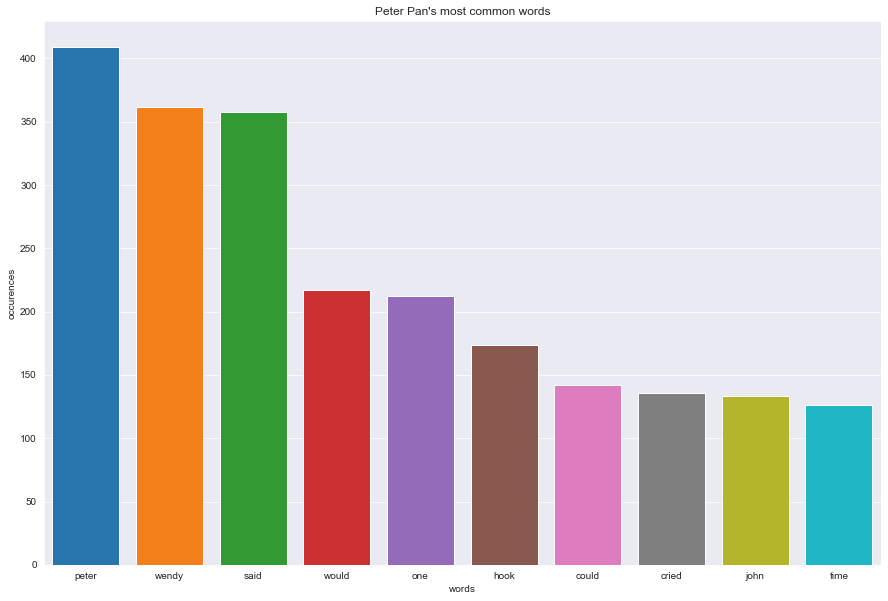

In [13]:
df = pd.DataFrame(top_ten, columns = ['words', 'occurences'])

sns.set_style('darkgrid')
plt.figure(figsize=(15,10))
sns.barplot(x='words', y='occurences', data=df, saturation=0.9).set_title("Peter Pan's most common words")